<a href="https://colab.research.google.com/github/thoriqakhdn/K-means/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate Data

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[15]:


import pandas as pd
import numpy as np


# In[27]:


# NIM = 1301204031
print("Input your NIM")
NIM = input(":")

try:
    NIM = int(NIM)
    np.random.seed(NIM)
    x1 = np.random.randint(1, high=50, size=10)
    x2 = np.random.randint(2, high=50, size=10)
    tmp_dict = {"x1": x1, "x2": x2}
    df = pd.DataFrame(tmp_dict)
    df["class (1 or 2)"] = ""

    tmp_dict = {"iteration": list(np.arange(5))}

    np.random.seed(NIM)
    x1 = np.random.randint(1, high=50, size=2)
    x2 = np.random.randint(2, high=50, size=2)

    tmp_dict["x1-centroid-1"] = x1[0]
    tmp_dict["x2-centroid-1"] = x1[1]
    tmp_dict["x1-centroid-2"] = x2[0]
    tmp_dict["x2-centroid-2"] = x2[1]

    cent_df = pd.DataFrame(tmp_dict)

    for i in range(4):
        cent_df.loc[i+1, "x1-centroid-1"] = ""
        cent_df.loc[i+1, "x2-centroid-1"] = ""
        cent_df.loc[i+1, "x1-centroid-2"] = ""
        cent_df.loc[i+1, "x2-centroid-2"] = ""

    with pd.ExcelWriter('Data_Set_{}.xlsx'.format(NIM)) as writer:
        df.to_excel(writer, sheet_name='Data Set', index=None)
        cent_df.to_excel(writer, sheet_name='Centroid', index=None)

except:
    print("Error: input is invalid: value is not a number")


Input your NIM
:1301204031


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

data = pd.read_excel('Data_Set_1301204031.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              10 non-null     int64  
 1   x2              10 non-null     int64  
 2   class (1 or 2)  0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [75]:
data.drop(columns='class (1 or 2)', inplace = True)

In [93]:
data.head()

,x1,x2
0,18,5
1,13,32
2,26,13
3,13,48
4,35,37


In [154]:
kmeans = KMeans(2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [160]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

In [161]:
from sklearn.cluster import KMeans

df = pd.DataFrame(data, columns=['x1', 'x2'])
  
kmeans = KMeans(n_clusters=8,init='k-means++',random_state=0).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[10.5 34.5]
 [19.5 28.5]
 [35.  37. ]
 [26.  13. ]
 [37.  49. ]
 [13.  48. ]
 [38.  26. ]
 [18.   5. ]]


Text(0, 0.5, 'WCSS')

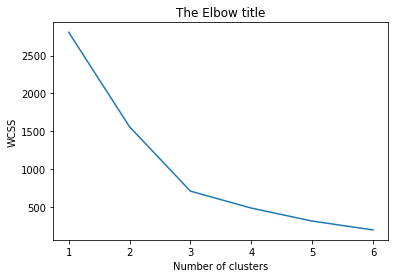

In [162]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')